In [21]:
src_dir = "../src"
import sys
sys.path.append(src_dir)

from install_if_missing import install_if_missing

install_if_missing("lifelines", verbose=True)
install_if_missing("shap", verbose=True)

'lifelines' is already installed.
'shap' is already installed.


In [22]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris
from lifelines.datasets import load_rossi

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

from lifelines import KaplanMeierFitter

import shap

## First test Scikit-Learn Install

In [23]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.Series(iris.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [24]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = model.predict(X_test)

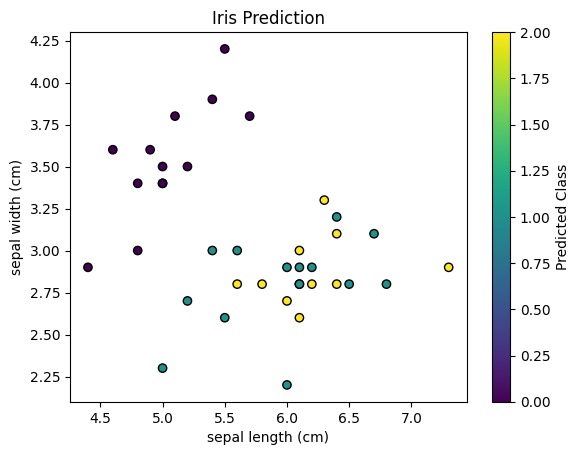

In [26]:
plt.figure()
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c = y_pred, cmap = 'viridis', edgecolor = 'k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Prediction")
plt.colorbar(label = "Predicted Class")
plt.show()

## Then test lifelines install

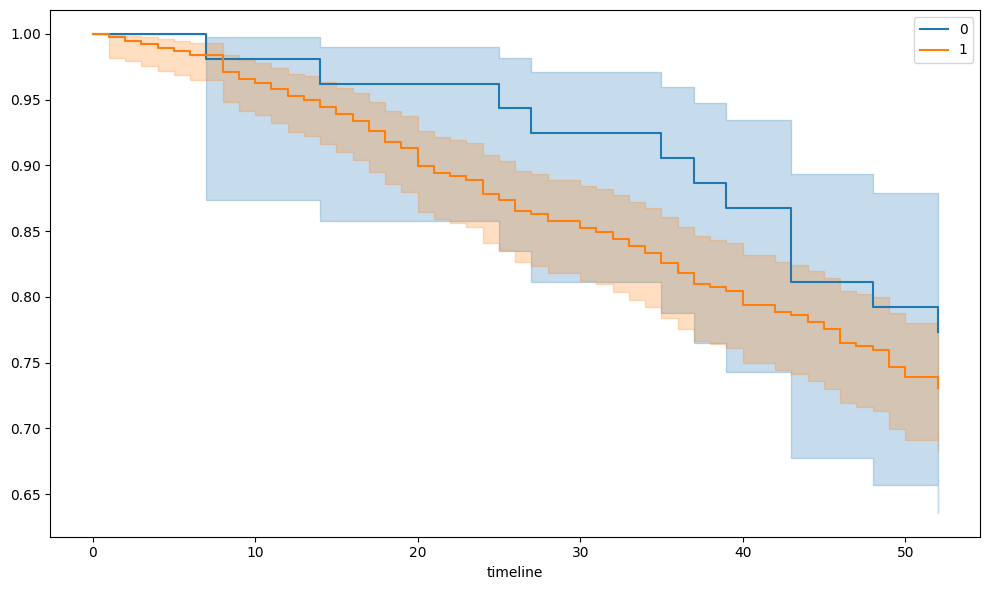

In [27]:
from lifelines.datasets import load_rossi

rossi = load_rossi()

kmf = KaplanMeierFitter()

fig, ax = plt.subplots(figsize = (10, 6))       
for label, group in rossi.groupby("race"):
    kmf.fit(durations = group["week"], event_observed = group["arrest"], label = label)
    kmf.plot_survival_function(label=label, ax=ax)
fig.tight_layout()
plt.show()

## Then test SHAP install

In [28]:
explainer = shap.TreeExplainer(model)
try: 
    shap_values = explainer.shap_values(X_test)
except Exception as e:
    if not hasattr(np, 'bool'):
        np.bool = bool

In [29]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap_array = np.array(shap_values) # has dimension (n_classes, n_samples, n_features)